In [18]:
from __future__ import  print_function
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [19]:
ibm_df=pd.read_csv('DataFiles/ibm-common-stock-closing-prices.csv')
ibm_df.index=ibm_df['Date']

In [20]:
print('Shape of the dataframe:',ibm_df.shape)

Shape of the dataframe: (1009, 2)


In [21]:
ibm_df.head(5)

,Date,IBM common stock closing prices
Date,,
1962-01-02,1962-01-02,572.00
1962-01-03,1962-01-03,577.00
1962-01-04,1962-01-04,571.25
1962-01-05,1962-01-05,560.00
1962-01-08,1962-01-08,549.50


In [22]:
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},inplace=True)
ibm_df.head()

,Date,Close_Price
Date,,
1962-01-02,1962-01-02,572.00
1962-01-03,1962-01-03,577.00
1962-01-04,1962-01-04,571.25
1962-01-05,1962-01-05,560.00
1962-01-08,1962-01-08,549.50


In [23]:
missing=(pd.isnull(ibm_df['Date'])) &(pd.isnull(ibm_df['Close_Price']))
print('No.of rows with missing values:',missing.sum())
ibm_df=ibm_df.loc[~missing,:]

No.of rows with missing values: 0


In [24]:
ibm_df['5-Day Moving Avg']=ibm_df['Close_Price'].rolling(5).mean()

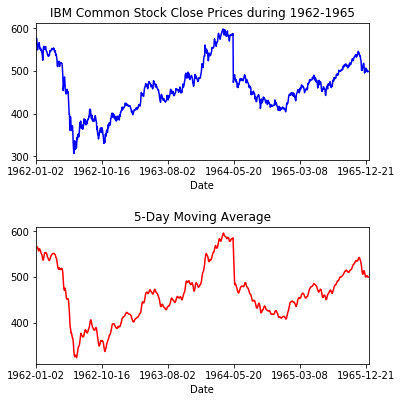

In [25]:
fig=plt.figure(figsize=(5.5,5.5))
ax=fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax,colors='b')
ax.set_title('IBM Common Stock Close Prices during 1962-1965')

ax=fig.add_subplot(2,1,2)
ibm_df['5-Day Moving Avg'].plot(ax=ax,color='r')
ax.set_title('5-Day Moving Average')
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=2.0)

In [26]:
MA2=ibm_df['Close_Price'].rolling(window=2).mean()
TwoXMA2=MA2.rolling(window=2).mean()

MA4=ibm_df['Close_Price'].rolling(window=4).mean()
TwoXMA4=MA4.rolling(window=2).mean()

MA3=ibm_df['Close_Price'].rolling(window=3).mean()
ThreeXMA3=MA3.rolling(window=3).mean()

In [27]:
MA2=MA2.ix[~pd.isnull(MA2)]
TwoXMA2=TwoXMA2.ix[~pd.isnull(TwoXMA2)]

MA4=MA2.ix[~pd.isnull(MA4)]
TwoXMA4=TwoXMA4.ix[~pd.isnull(TwoXMA4)]

MA3=MA3.ix[~pd.isnull(MA3)]
ThreeXMA3=TwoXMA4.ix[~pd.isnull(ThreeXMA3)]

/home/akinyalcinkaya/anaconda2/envs/tensorlow/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/akinyalcinkaya/anaconda2/envs/tensorlow/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/akinyalcinkaya/anaconda2/envs/tensorlow/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.ht

IOError: [Errno 2] No such file or directory: 'plots/ch2/B07887_02_15.png'

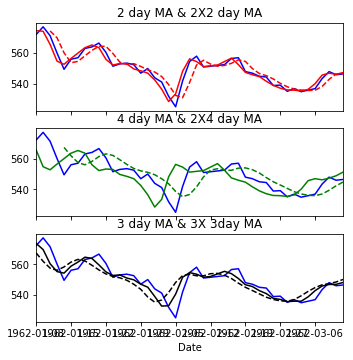

In [28]:

f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
MA2.iloc[:45].plot(color='r', linestyle = '-', ax=axarr[0])
TwoXMA2.iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('2 day MA & 2X2 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
MA4.iloc[:45].plot(color='g', linestyle = '-', ax=axarr[1])
TwoXMA4.iloc[:45].plot(color='g', linestyle = '--', ax=axarr[1])
axarr[1].set_title('4 day MA & 2X4 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
MA3.iloc[:45].plot(color='k', linestyle = '-', ax=axarr[2])
ThreeXMA3.iloc[:45].plot(color='k', linestyle = '--', ax=axarr[2])
axarr[2].set_title('3 day MA & 3X 3day MA')
plt.savefig('plots/ch2/B07887_02_15.png', format='png', dpi=300)